In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

In [2]:
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_yticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_yticklabels(labels, rotation=0)

In [3]:
df = pd.read_csv('histogramm_ech_1444.csv')
df = df.replace(['group_05', 'group_06', 'group_07', 'group_08', 'group_09', 'group_10', 'group_11', 'group_12', 
                'group_13', 'group_14', 'group_15', 'group_16', 'group_17', 'group_18', 'group_19', 'group_20', 
                'group_21', 'group_22', 'group_23', 'group_24', 'group_25', 'group_26', 'group_27', 'group_28', 
                'group_29', 'group_30', 'group_31', 'group_32'],
               ['marchands', 'boulangers', 'bouchers', 
                'tonneliers', 'drapiers', 'tanneurs', 
                'cabaretiers', 'maçons', 'forgerons', 
                'tailleurs', 'bateliers', 'pelletiers', 
                'charpentiers', 'crieurs et mesureurs de vin', 
                'cordonniers', 'orfèvres', 'marchands de grains', 
                'jardiniers', 'pêcheurs', 'barbiers et baigneurs', 
                'sauniers', 'tisserands', 'gourmets et courtiers', 
                'charrons', 'regrattiers, cordiers et fruitiers', 
                'coltineurs de tonneaux', 'constructeurs de bateaux', 
                'huiliers meuniers et tondeurs de draps'])
df = df.rename(columns={'represents_in':'corporation'})
df['effectif'] = df.groupby('corporation')['corporation'].transform('count')
df = df.drop_duplicates()

In [17]:
ordered_df = df.sort_values(by='effectif')
my_range=range(1,len(ordered_df.index)+1)
my_x = ordered_df['effectif'].to_list()

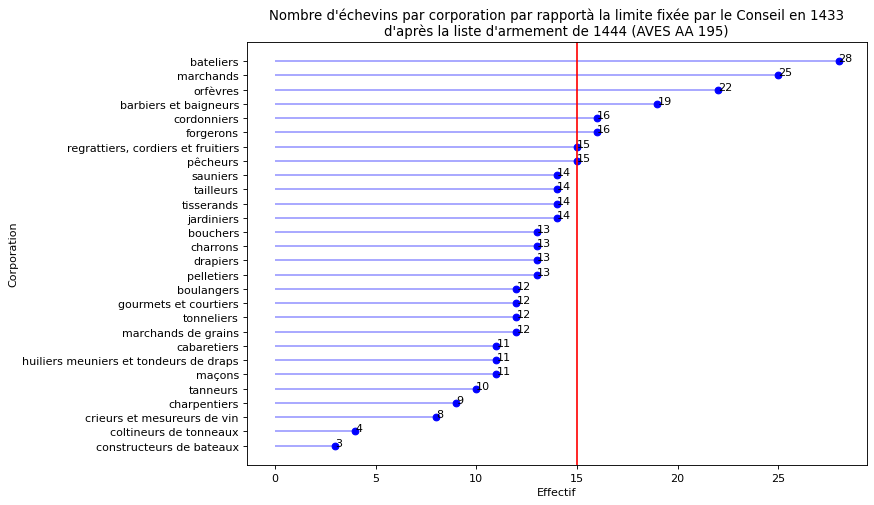

In [32]:
plt.figure(figsize=(10, 7), dpi=80)

plt.hlines(y=my_range, xmin=0, xmax=ordered_df['effectif'], color='b', alpha=0.4, label='d')
plt.scatter(ordered_df['effectif'], my_range, color='b', alpha=1)
plt.axvline(x=15, color='r', linestyle='-')

for i, txt in enumerate(ordered_df['effectif']):
    plt.annotate(txt, (my_x[i], my_range[i]))

plt.yticks(my_range, ordered_df['corporation'])
plt.title("Nombre d'échevins par corporation par rapportà la limite fixée par le Conseil en 1433\nd'après la liste d'armement de 1444 (AVES AA 195)", loc='center')
plt.xlabel('Effectif')
plt.ylabel('Corporation')
plt.savefig('./Images/lolipop.svg', transparent=True, dpi=80, bbox_inches='tight')